In [2]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import numpy as np
import timeit
import itertools
import importlib
import os
import glob
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

In [3]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Dataset = 'Ocean1'
Oc_mod_type = 'COM_NEMO-CNRS'
Bet_path = '/bettik/bouissob/'
D_path = os.path.join(Bet_path, 'Method_Data/COM_NEMO-CNRS/Method_4', 'Ocean4.csv')

In [ ]:
df =

def Hyp_param_list(Ind, Max):
    List =['1', '4', '8','16', '32', '64', '96', '128']
    string = []
    Possible = List[min(6, 3 * Ind + int(Max)) :min(int(Max/ 1.5) + 3 + 2 * Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]
li = []
for i in range(3):
    li.extend(Hyp_param_list(0, i))
li

In [4]:
A = []
B = []
A = [1,2,2,34,4324,324,23,432,4,4]
pd.DataFrame(A).T

,0,1,2,3,4,5,6,7,8,9
0,1,2,2,34,4324,324,23,432,4,4


In [34]:
Neur = ['64_64_64_96_96']

In [35]:
B.extend(Neur * len(A))

In [37]:
B

['64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96',
 '64_64_64_96_96']

In [94]:
def Verify_string_tuple(Seqs, extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128']
    seqsT = list(Seqs)
    Min = int(Seqs[0][0])
    for ind, seq in enumerate(Seqs):
        removed = 0
        int_list = [int(i) for i in seq]
        Max = int_list[0]
        for ints in int_list:
            if ints<Max:
                seqsT.remove(seq)
                removed = 1
                break
            else:
                Max = ints
        if extent >= 3 and removed == 0:
            if int_list.count(Min) < int(extent)/2 and int_list.count(Min)!=0:
                seqsT.remove(seq)
    return seqsT
            
def Hyp2(Extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128'] 
    li = List[min(Extent-1 + int(Extent/2), min(len(List)-2, len(List) - 4 + int(Extent/5))):Extent + 3 + int(2/Extent) + int(Extent/5)]
    permut = list(itertools.product(li, repeat = Extent))
    Seq = Verify_string_tuple(permut, Extent)
    return ['_'.join(i) for i in Seq]

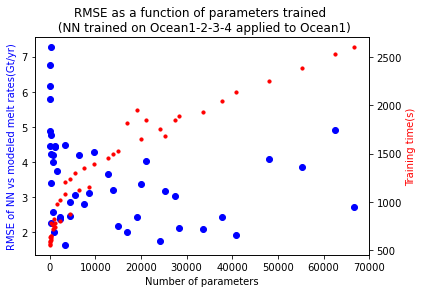

In [30]:
#def Compute_data_for_plotting(Epoch = 4, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1, index = None, **NN_attributes):
importlib.reload(NN)
Rm1, Param1, Neur1,t = NN.Plot_RMSE_to_param(save = True, Epoch = 8, Ocean_trained = OcT, message = 0, Ocean_target = 'Ocean1', Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Exact':1, 'Extra_n' : 'Same_ind'})

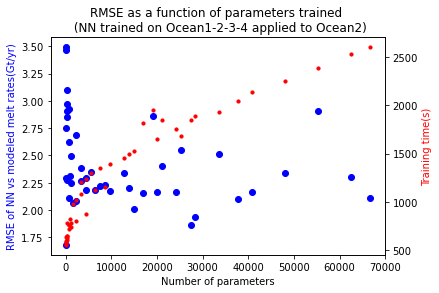

In [31]:
Rm, Param, Neur, t = NN.Plot_RMSE_to_param(save = True, Epoch = 8, Ocean_trained = OcT, message = 0, Ocean_target = 'Ocean2', Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Exact':1, 'Extra_n' : 'Same_ind'})

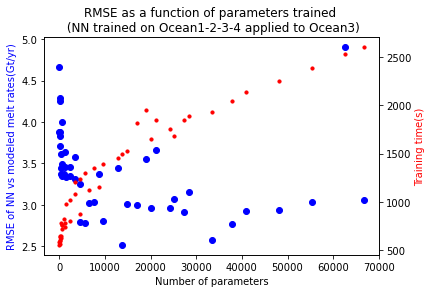

In [32]:
Rm3, Param3, Neur3, t3 = NN.Plot_RMSE_to_param(save = True, Epoch = 8, Ocean_trained = OcT, message = 0, Ocean_target = 'Ocean3', Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Exact':1, 'Extra_n' : 'Same_ind'})

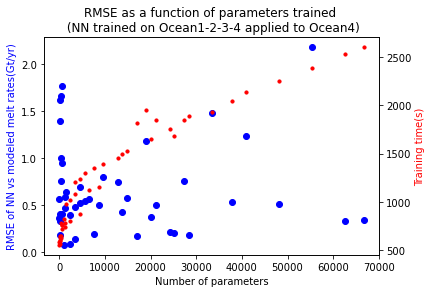

In [33]:
Rm4, Param4, Neur4, t4 = NN.Plot_RMSE_to_param(save = True, Epoch = 8, Ocean_trained = OcT, message = 0, Ocean_target = 'Ocean4', Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Exact':1, 'Extra_n' : 'Same_ind'})

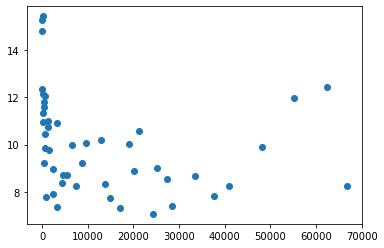

In [101]:
RM = Rm1 + Rm + Rm3 + Rm4
plt.scatter(Param, RM)


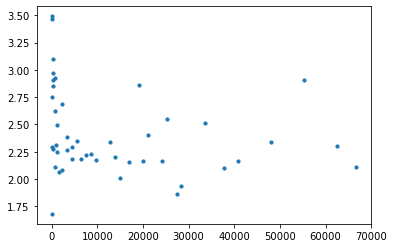

In [26]:
plt.scatter(Param, Rm, s = 10)

In [115]:
AVC = np.array((12, 34 ,45))
pd.DataFrame(AVC)

,0
0,12
1,34
2,45


In [3]:
li = [Rm1, Rm, Rm3, Rm4]
Nrm = []
for l in li:
    Min = min(l)
    Max = max(l)
    Nrm.append(np.array((l - Min) / (Max-Min)))
L = Nrm[0] + Nrm[1] + Nrm[2] + Nrm[3]
plt.scatter(Param, L)

NameError: name 'Rm1' is not defined

In [26]:
Neur[RM.argmin()]

'64_64_64_96_96'

In [109]:
[i[0:5] for i in Var_X1]

['x', 'y', 'therm', 'halin', 'iceDr']

In [10]:
Datasets = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
li = []
for Ind, Dataset in enumerate(Datasets):
    D_path = os.path.join(Bet_path, 'Data', 'data_{}_{}.csv'.format(Dataset, Oc_mod_type))
    df = pd.read_csv(D_path)
    df['Oc'] = Ind + 1
    li.append(df)
DF = pd.concat(li, ignore_index= True)
#Masks = os.path.join(os.getcwd(), 'Auto_model', 'tmp', '_'.join(Datasets), 'ind_1646995963.csv')
#DF = DF.loc[np.loadtxt(Masks).astype(int)]
#DF['Oc'].value_counts(sort=True).plot.bar()

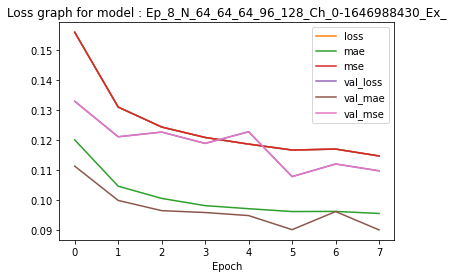

In [32]:
importlib.reload(NN)
NN.Plot_loss_model(ind = 0, Epoch = 8, Ocean = OcT, Neur = '64_64_64_96_128') 

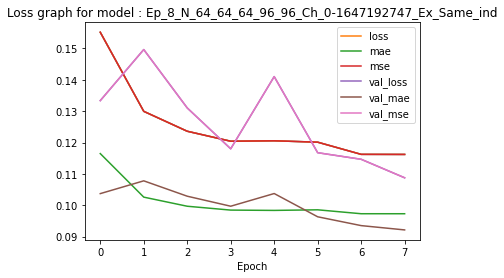

In [33]:
NN.Plot_loss_model(save = True, ind = 0, Epoch = 8, Ocean = OcT, Neur = '64_64_64_96_96', Extra_n = 'Same_ind') 

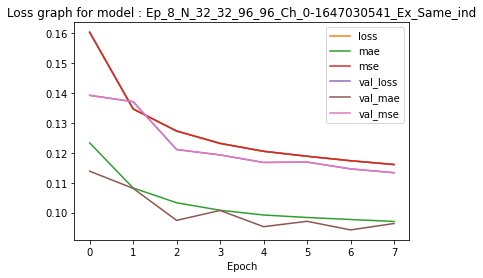

In [52]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Extra_n = 'Same_ind') 

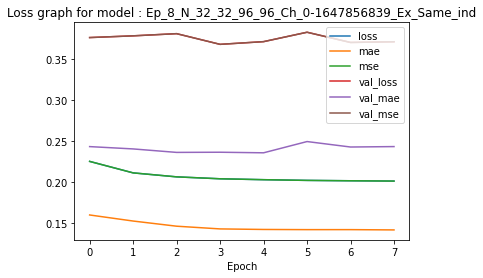

In [67]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Drop = "Default") 

In [15]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

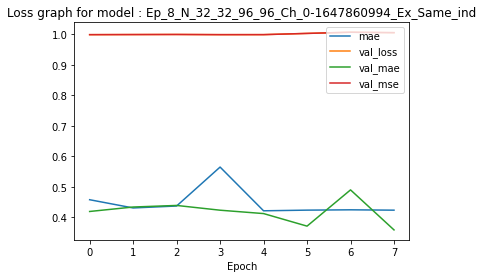

In [34]:
Plotting.Plot_loss_model(Forbid_key = ['mse', 'loss'], save = False, ind = 1, Epoch = 8, 
                        Ocean = OcT, Neur = '32_32_96_96', Drop = "Default", Extra_n = 'Same_ind') 

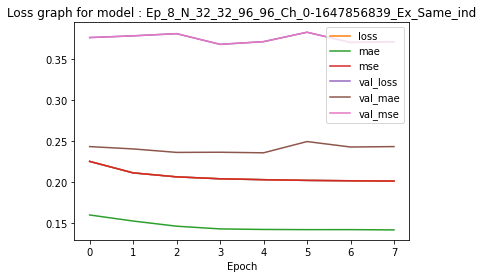

In [50]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Drop = 'Default') 

IndexError: list index out of range

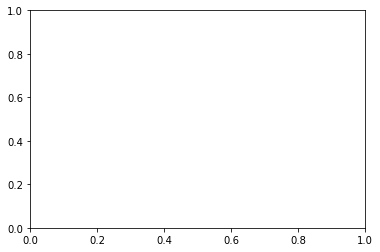

In [51]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 8, Ocean = OcT, Cutting = 'Same_t') 

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, message = 0, 
    Ocean_target = OcT, NN_attributes = {'Epoch':8, 'Neur' : '64_64_64_96_96', 'Extra_n' : 'Same_ind', 'Ocean':OcT},index = 0, Compute_at_ind = True)

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind


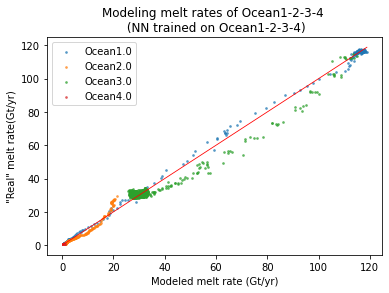

In [11]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = False, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                                                        'Extra_n' : 'Same_ind'}, Compute_at_ind = False)

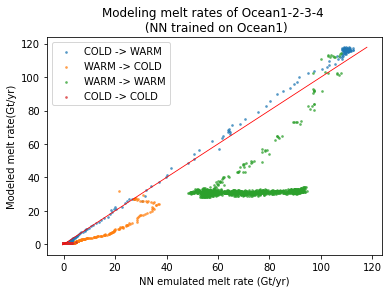

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526567.png


In [45]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

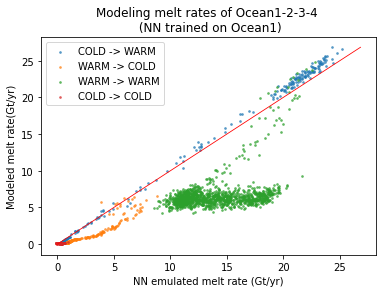

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526618.png


In [46]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

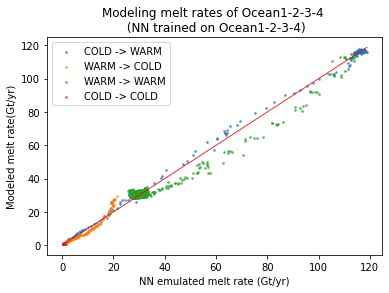

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526690.png


In [47]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

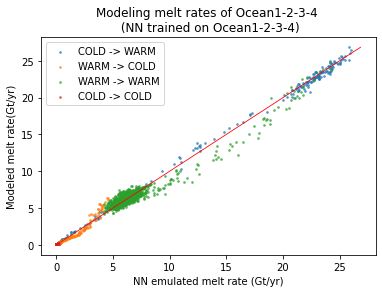

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526741.png


In [48]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

In [38]:
Dict = {'Ocean1' : 'COLD -> WARM', 'Ocean2' : 'WARM -> COLD', 'Ocean3' : 'WARM -> WARM', 'Ocean4' : 'COLD -> COLD'}

In [43]:
Dict['Ocean1']

'COLD -> WARM'

In [ ]:
importlib.reload(Trainings)
Training = Trainings.Sequencial_training(Trainings.model_NN)

Training.training(training_extent = 0, verbose = 0, batch_size = 128, Exact = 1, message = 1,Standard_train = ['64_64_64_96_96'],
                Dataset_train = OcT, Epoch = 8, Var_X = Var_X_non_position, Verify = 0, 
                  Extra_n = 'Same_ind_drop', Similar_training = 1, Norm_Choix = 0, Drop = True)